In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1

from fastf1 import core,ergast,events,livetiming,plotting
from matplotlib.collections import LineCollection

# List of Events

In [51]:
year  = int(input("Enter F1 Season: "))
season_data = fastf1.get_event_schedule(year,include_testing=False)
season_data.drop(['Session1Date','Session2Date','Session3Date','Session4Date','Session5Date','F1ApiSupport'],axis=1,inplace=True)
season_data

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1DateUtc,Session2,Session2DateUtc,Session3,Session3DateUtc,Session4,Session4DateUtc,Session5,Session5DateUtc
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 11:30:00,Practice 2,2023-03-03 15:00:00,Practice 3,2023-03-04 11:30:00,Qualifying,2023-03-04 15:00:00,Race,2023-03-05 15:00:00
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 13:30:00,Practice 2,2023-03-17 17:00:00,Practice 3,2023-03-18 13:30:00,Qualifying,2023-03-18 17:00:00,Race,2023-03-19 17:00:00
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 01:30:00,Practice 2,2023-03-31 05:00:00,Practice 3,2023-04-01 01:30:00,Qualifying,2023-04-01 05:00:00,Race,2023-04-02 05:00:00
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 09:30:00,Qualifying,2023-04-28 13:00:00,Sprint Shootout,2023-04-29 08:30:00,Sprint,2023-04-29 13:30:00,Race,2023-04-30 11:00:00
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 18:00:00,Practice 2,2023-05-05 21:30:00,Practice 3,2023-05-06 16:30:00,Qualifying,2023-05-06 20:00:00,Race,2023-05-07 19:30:00
6,7,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 11:30:00,Practice 2,2023-05-26 15:00:00,Practice 3,2023-05-27 10:30:00,Qualifying,2023-05-27 14:00:00,Race,2023-05-28 13:00:00
7,8,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 11:30:00,Practice 2,2023-06-02 15:00:00,Practice 3,2023-06-03 10:30:00,Qualifying,2023-06-03 14:00:00,Race,2023-06-04 13:00:00
8,9,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 17:30:00,Practice 2,2023-06-16 20:30:00,Practice 3,2023-06-17 16:30:00,Qualifying,2023-06-17 20:00:00,Race,2023-06-18 18:00:00
9,10,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 11:30:00,Qualifying,2023-06-30 15:00:00,Sprint Shootout,2023-07-01 10:00:00,Sprint,2023-07-01 14:30:00,Race,2023-07-02 13:00:00


# Collecting Round No. and Session Data

In [52]:
round = int(input("Enter Round No."))
session = input("Pracrice 1: FP1, Pracrice 2: FP2, Pracrice 3: FP3, Sprint: S, Sprint-Shootout: SS, Qualifying : Q, Race: R \nEnter Session : ")

race_data = fastf1.get_session(year, round, identifier=session)
race_data.load(laps=True, telemetry=True, weather=True, messages=True, livedata=None)

ValueError: invalid literal for int() with base 10: 'R'

# Podium Racer of the Round

In [ ]:
podium = race_data.results[:3]
podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)
podium

# Fastest Lap Time of the Round

In [ ]:
if year >2017:
    fast_lap = race_data.laps.pick_fastest()

    print(f"Fastest Lap Driver: {fast_lap['Driver']}")
    print(f"Fastest Driver Team: {fast_lap['Team']}")
    print(f"Fastest Driver Position: {fast_lap['Position']}")
    print(f"Fastest LapTime: {fast_lap['LapTime'].to_pytimedelta()}")
    print(f"Fastest LapNumber: {fast_lap['LapNumber']}")
    print(f"\t Fastest Sector 1: {fast_lap['Sector1Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 2: {fast_lap['Sector2Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 3: {fast_lap['Sector3Time'].to_pytimedelta()}")
else:
    print('Fatest Lap Data Only availabe from 2018 - Current')

# Driver Code for the Race

In [ ]:
laps = race_data.laps

drivers = race_data.drivers
drivers = [race_data.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

# Tyre Strategies of the Race

In [ ]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig1, ax = plt.subplots(figsize=(10, 6))

plt.title(f"{year} -> Round - {round} Tyre Strategies")
plt.xlabel("Lap Number")
plt.grid(False)

# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    # print(driver_stints)

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )


        previous_stint_end += row["StintLength"]

plt.show()

In [62]:
pod_1 = race_data.laps.pick_driver(podium['Abbreviation'][0]).pick_fastest()
pod_1_tel = pod_1.get_telemetry()
points_1 = np.array([pod_1_tel['X'].values, pod_1_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_1 = np.concatenate([points_1[:-1], points_1[1:]], axis=1)

pod_2 = race_data.laps.pick_driver(podium['Abbreviation'][1]).pick_fastest()
pod_2_tel = pod_2.get_telemetry()
points_2 = np.array([pod_2_tel['X'].values, pod_2_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_2 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

pod_3 = race_data.laps.pick_driver(podium['Abbreviation'][2]).pick_fastest()
pod_3_tel = pod_3.get_telemetry()
points_3 = np.array([pod_3_tel['X'].values, pod_3_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_3 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

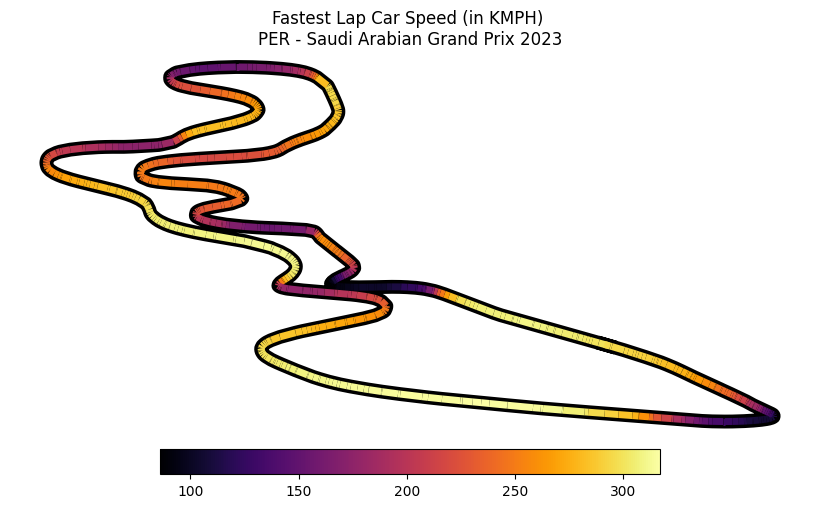

In [63]:
# Speed

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{pod_1['Driver']} - {race_data.event['EventName']} {race_data.event.year}"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['Speed'].min(), pod_1_tel['Speed'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Speed'].min(), vmax=pod_1_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

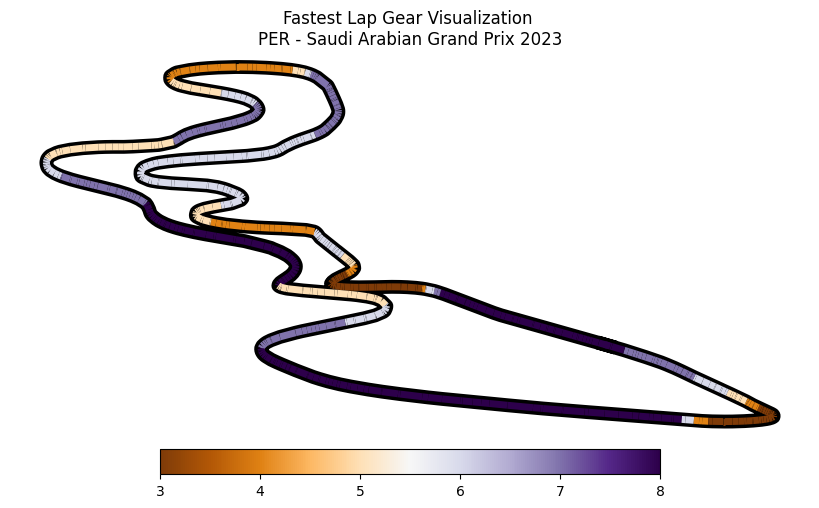

In [64]:
# Gear

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{pod_1['Driver']} - {race_data.event['EventName']} {race_data.event.year}"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['nGear'].min(), pod_1_tel['nGear'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['nGear'].min(), vmax=pod_1_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

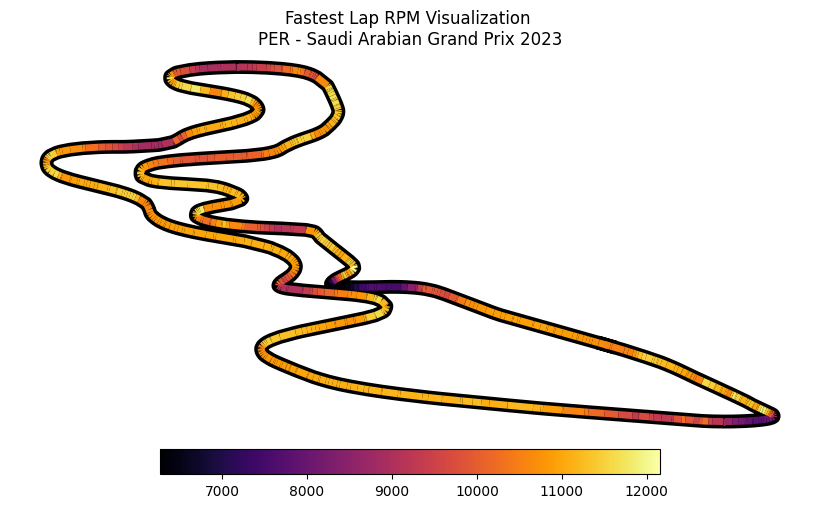

In [65]:
# RPM

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{pod_1['Driver']} - {race_data.event['EventName']} {race_data.event.year}"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['RPM'].min(), pod_1_tel['RPM'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['RPM'].min(), vmax=pod_1_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

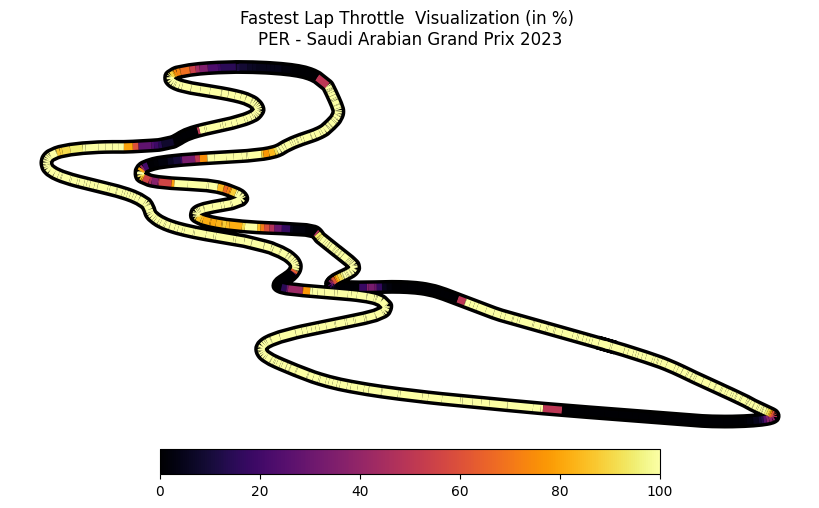

In [66]:
# Throttle

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{pod_1['Driver']} - {race_data.event['EventName']} {race_data.event.year}"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['Throttle'].min(), pod_1_tel['Throttle'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Throttle'].min(), vmax=pod_1_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

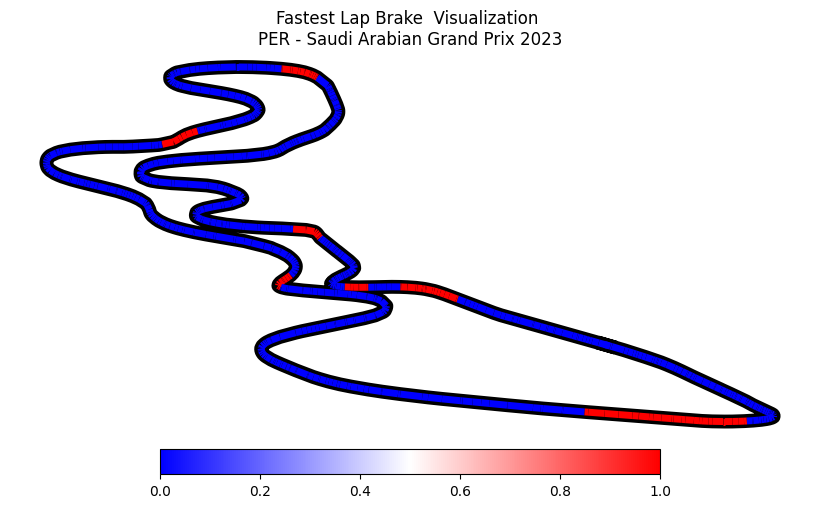

In [67]:
# Brake

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{pod_1['Driver']} - {race_data.event['EventName']} {race_data.event.year}"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['Brake'].min(), pod_1_tel['Brake'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Brake'].min(), vmax=pod_1_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()